In [16]:
"""!pip install ffn
!pip install pypfopt
!pip install empyrical"""

'!pip install ffn\n!pip install pypfopt\n!pip install empyrical'

In [25]:
import ffn

import numpy as np
import pandas as pd
from empyrical import alpha_beta
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#import matplotlib.pyplot as plt
import warnings
#plt.style.use('dark_background')
#warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [26]:

folder = '../data/'
file = 'ffn.csv'
filename = f"{folder}{file}"
isin='LU0843168575'
filename

isins=['LU0280438135','LU0255977372','LU0133806785']

In [27]:
prices = ffn.get(f'{isins[0]}-NAV,{isins[1]}-NAV,{isins[2]}-NAV', provider=ffn.data.csv, path=filename)
prices


,lu0280438135nav,lu0255977372nav,lu0133806785nav
index,,,
2007-01-31,82.94,235.61,153.18
2007-02-28,82.03,225.88,154.05
2007-03-30,82.71,222.03,154.49
2007-04-30,81.72,234.12,156.03
2007-05-31,83.09,242.14,157.24
...,...,...,...
2021-11-30,166.18,939.68,296.01
2021-12-31,167.60,967.02,299.31
2022-02-28,168.66,778.52,282.88


<IPython.core.display.Javascript object>

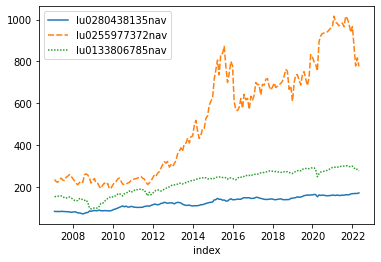

In [28]:
sns.lineplot(data=prices)
plt.show()

In [29]:
#prices = ffn.get('TTWO, CCOEY, EA', start='2019-01-01')
#benchmark = ffn.get(f'{isins[0]}-level',provider=ffn.data.csv, path=filename)
#ax = prices.rebase().plot(figsize=(12,5))
#plt.show()

In [30]:
prices

,lu0280438135nav,lu0255977372nav,lu0133806785nav
index,,,
2007-01-31,82.94,235.61,153.18
2007-02-28,82.03,225.88,154.05
2007-03-30,82.71,222.03,154.49
2007-04-30,81.72,234.12,156.03
2007-05-31,83.09,242.14,157.24
...,...,...,...
2021-11-30,166.18,939.68,296.01
2021-12-31,167.60,967.02,299.31
2022-02-28,168.66,778.52,282.88


In [31]:
returns = prices['2007-01-31':'2022-12-31'].to_returns().dropna()

<IPython.core.display.Javascript object>

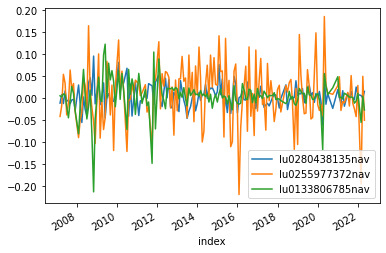

In [32]:
returns.plot()
plt.show()

In [33]:
stats = prices['2007-01-31':'2021-10-31'].calc_stats()
stats.display()

Stat                 lu0280438135nav    lu0255977372nav    lu0133806785nav
-------------------  -----------------  -----------------  -----------------
Start                2007-01-31         2007-01-31         2007-01-31
End                  2021-10-29         2021-10-29         2021-10-29
Risk-free rate       0.00%              0.00%              0.00%

Total Return         95.37%             316.18%            94.48%
Daily Sharpe         -                  -                  -
Daily Sortino        -                  -                  -
CAGR                 4.65%              10.15%             4.61%
Max Drawdown         -14.82%            -35.20%            -39.77%
Calmar Ratio         0.31               0.29               0.12

MTD                  -0.28%             -2.39%             -1.11%
3m                   0.97%              -0.30%             -0.41%
6m                   0.32%              -0.04%             1.39%
YTD                  1.03%              1.21%              1

<IPython.core.display.Javascript object>

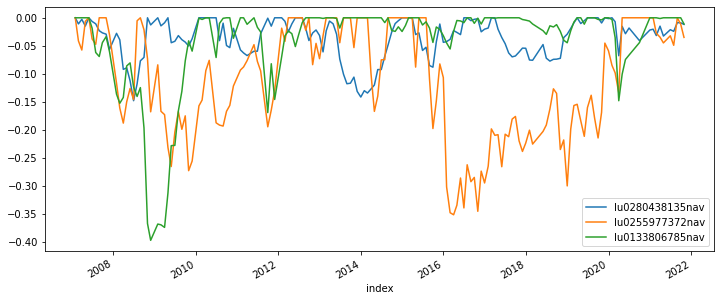

In [34]:
stats.prices.to_drawdown_series().plot(figsize=(12,5))
plt.show()

In [35]:
stats.prices.calc_cagr()

lu0280438135nav    0.046473
lu0255977372nav    0.101549
lu0133806785nav    0.046148
dtype: float64

In [36]:
returns = prices.to_log_returns().dropna()
returns.calc_mean_var_weights().as_format('.2%')

lu0280438135nav    64.16%
lu0255977372nav     9.64%
lu0133806785nav    26.21%
dtype: object

In [37]:
returns.calc_erc_weights().as_format('.2%')

lu0280438135nav    49.45%
lu0255977372nav    17.22%
lu0133806785nav    33.33%
Name: erc, dtype: object

In [38]:
from empyrical import alpha_beta

symbols = [f'{isin}-NAV']
for sym in symbols:
    stk = ffn.get(sym, provider=ffn.data.csv, path=filename)
    alpha, beta = alpha_beta(stk, benchmark)
    print(sym, beta)


In [39]:
returns = prices.pct_change()
weight = np.array([10,10,10])

t = np.sum(weight)
weights = weight/t
# mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)

print("Expected annualised return: " + str(portfolio_return*100))
print("Volatility: " + str(portfolio_std_dev*100))

Expected annualised return: 153.0
Volatility: 48.0


In [42]:
portfolio_return

1.53

In [43]:
mean_daily_returns

lu0280438135nav    0.004664
lu0255977372nav    0.009296
lu0133806785nav    0.004254
dtype: float64

In [44]:
returns

,lu0280438135nav,lu0255977372nav,lu0133806785nav
index,,,
2007-01-31,NaN,NaN,NaN
2007-02-28,-0.010972,-0.041297,0.005680
2007-03-30,0.008290,-0.017044,0.002856
2007-04-30,-0.011970,0.054452,0.009968
2007-05-31,0.016765,0.034256,0.007755
...,...,...,...
2021-11-30,0.025549,-0.041681,-0.006344
2021-12-31,0.008545,0.029095,0.011148
2022-02-28,0.006325,-0.194929,-0.054893


In [45]:
portfolio_return

1.53

In [46]:
prices.iloc[0]

lu0280438135nav     82.94
lu0255977372nav    235.61
lu0133806785nav    153.18
Name: 2007-01-31 00:00:00, dtype: float64

In [47]:
#pip install PyPortfolioOpt

In [48]:
import pyfolio as pf

In [49]:
prices

,lu0280438135nav,lu0255977372nav,lu0133806785nav
index,,,
2007-01-31,82.94,235.61,153.18
2007-02-28,82.03,225.88,154.05
2007-03-30,82.71,222.03,154.49
2007-04-30,81.72,234.12,156.03
2007-05-31,83.09,242.14,157.24
...,...,...,...
2021-11-30,166.18,939.68,296.01
2021-12-31,167.60,967.02,299.31
2022-02-28,168.66,778.52,282.88


In [50]:
x=ffn.core.drawdown_details(ffn.core.calc_max_drawdown(prices))

In [51]:
ffn.core.GroupStats(prices).display()

Stat                 lu0280438135nav    lu0255977372nav    lu0133806785nav
-------------------  -----------------  -----------------  -----------------
Start                2007-01-31         2007-01-31         2007-01-31
End                  2022-04-29         2022-04-29         2022-04-29
Risk-free rate       0.00%              0.00%              0.00%

Total Return         106.56%            229.62%            80.63%
Daily Sharpe         -                  -                  -
Daily Sortino        -                  -                  -
CAGR                 4.87%              8.14%              3.96%
Max Drawdown         -14.82%            -35.20%            -39.77%
Calmar Ratio         0.33               0.23               0.10

MTD                  1.57%              -4.99%             -2.66%
3m                   2.22%              -19.69%            -7.56%
6m                   5.73%              -20.80%            -7.12%
YTD                  2.22%              -19.69%            

In [52]:
100*((1*(106.56/100))+(1*(229.62/100))+(1*(80.63/100))-3)

116.81000000000009

In [53]:
(((1*(106.56/100)))+1)+(((1*(229.62/100)))+1)+(((1*(80.63/100)))+1)-3


4.168100000000001

In [54]:
(((1*(229.62/100)))+1)/3

1.0987333333333333

In [55]:
((1*(80.63/100)))+1

1.8062999999999998

In [ ]:
pf?

In [ ]:
prices

In [ ]:
returns 

In [ ]:
p = prices.copy()

In [ ]:
p

In [ ]:
p.index = p.index.tz_localize('utc')

In [ ]:
p

In [ ]:
returns = p.lu0280438135nav.pct_change()

In [ ]:
pf.create_returns_tear_sheet(returns, live_start_date='2007-01-31')